<a href="https://colab.research.google.com/github/aisyashlf/-Final-Task-Home-Credit-Scorecard-Model/blob/main/%5BFinal_Task%5D_Home_Credit_Scorecard_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORT DATA**

In [1]:
import pandas as pd

In [44]:
df_app_train = pd.read_csv('/content/application_train.csv')
df_app_test = pd.read_csv('/content/application_test.csv')
df_pre_app = pd.read_csv('/content/previous_application.csv')
df_credit = pd.read_csv('/content/credit_card_balance.csv')
df_bureau = pd.read_csv('/content/bureau.csv')
df_bureau_balance = pd.read_csv('/content/bureau_balance.csv')
df_pos = pd.read_csv('/content/POS_CASH_balance.csv')

In [45]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [46]:
df_app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [47]:
df_pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131.0,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20.0,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16.0,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16.0,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21.0,NaN


In [49]:
df_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0.0,C
1,5715448,-1.0,C
2,5715448,-2.0,C
3,5715448,-3.0,C
4,5715448,-4.0,C


In [50]:
df_pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0.0,0.0
1,1715348,367990,-33,36.0,35.0,Active,0.0,0.0
2,1784872,397406,-32,12.0,9.0,Active,0.0,0.0
3,1903291,269225,-35,48.0,42.0,Active,0.0,0.0
4,2341044,334279,-35,36.0,35.0,Active,0.0,0.0


In [51]:
df_credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1.0,0.0,1.0,35.0,Active,0.0,0.0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1.0,0.0,0.0,69.0,Active,0.0,0.0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0.0,0.0,0.0,30.0,Active,0.0,0.0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1.0,0.0,0.0,10.0,Active,0.0,0.0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1.0,0.0,1.0,101.0,Active,0.0,0.0


In [52]:
df_pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0.0,0.0
1,1715348,367990,-33,36.0,35.0,Active,0.0,0.0
2,1784872,397406,-32,12.0,9.0,Active,0.0,0.0
3,1903291,269225,-35,48.0,42.0,Active,0.0,0.0
4,2341044,334279,-35,36.0,35.0,Active,0.0,0.0


#**DATA CLEANING**

##application_train.csv

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)  # tampilkan semua kolom
df_app_train.dtypes


,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [6]:
df_app_train.dtypes.astype(str).value_counts()


,count
float64,103
object,16
int64,3


In [7]:
df_app_train['TARGET']=df_app_train['TARGET'].astype('category')
df_app_train['NAME_CONTRACT_TYPE']=df_app_train['NAME_CONTRACT_TYPE'].astype('category')
df_app_train['CODE_GENDER']=df_app_train['CODE_GENDER'].astype('category')
df_app_train['FLAG_OWN_CAR']=df_app_train['FLAG_OWN_CAR'].astype('category')
df_app_train['FLAG_OWN_REALTY']=df_app_train['FLAG_OWN_REALTY'].astype('category')
df_app_train['NAME_TYPE_SUITE']=df_app_train['NAME_TYPE_SUITE'].astype('category')
df_app_train['NAME_INCOME_TYPE']=df_app_train['NAME_INCOME_TYPE'].astype('category')
df_app_train['NAME_EDUCATION_TYPE']=df_app_train['NAME_EDUCATION_TYPE'].astype('category')
df_app_train['NAME_FAMILY_STATUS']=df_app_train['NAME_FAMILY_STATUS'].astype('category')
df_app_train['NAME_HOUSING_TYPE']=df_app_train['NAME_HOUSING_TYPE'].astype('category')
df_app_train['OCCUPATION_TYPE']=df_app_train['OCCUPATION_TYPE'].astype('category')
df_app_train['WEEKDAY_APPR_PROCESS_START']=df_app_train['WEEKDAY_APPR_PROCESS_START'].astype('category')
df_app_train['ORGANIZATION_TYPE']=df_app_train['ORGANIZATION_TYPE'].astype('category')
df_app_train['FONDKAPREMONT_MODE']=df_app_train['FONDKAPREMONT_MODE'].astype('category')
df_app_train['HOUSETYPE_MODE']=df_app_train['HOUSETYPE_MODE'].astype('category')
df_app_train['WALLSMATERIAL_MODE']=df_app_train['WALLSMATERIAL_MODE'].astype('category')
df_app_train['EMERGENCYSTATE_MODE']=df_app_train['EMERGENCYSTATE_MODE'].astype('category')
df_app_train['FLAG_CONT_MOBILE']=df_app_train['FLAG_CONT_MOBILE'].astype('category')
df_app_train['FLAG_EMP_PHONE']=df_app_train['FLAG_EMP_PHONE'].astype('category')
df_app_train['FLAG_WORK_PHONE']=df_app_train['FLAG_WORK_PHONE'].astype('category')
df_app_train['FLAG_PHONE']=df_app_train['FLAG_PHONE'].astype('category')
df_app_train['FLAG_EMAIL']=df_app_train['FLAG_EMAIL'].astype('category')
df_app_train['REGION_RATING_CLIENT']=df_app_train['REGION_RATING_CLIENT'].astype('category')
df_app_train['REGION_RATING_CLIENT_W_CITY']=df_app_train['REGION_RATING_CLIENT_W_CITY'].astype('category')
df_app_train['REG_REGION_NOT_LIVE_REGION']=df_app_train['REG_REGION_NOT_LIVE_REGION'].astype('category')
df_app_train['LIVE_REGION_NOT_WORK_REGION']=df_app_train['LIVE_REGION_NOT_WORK_REGION'].astype('category')
df_app_train['REG_CITY_NOT_LIVE_CITY']=df_app_train['REG_CITY_NOT_LIVE_CITY'].astype('category')
df_app_train['REG_CITY_NOT_WORK_CITY']=df_app_train['REG_CITY_NOT_WORK_CITY'].astype('category')
df_app_train['LIVE_CITY_NOT_WORK_CITY']=df_app_train['LIVE_CITY_NOT_WORK_CITY'].astype('category')
df_app_train['AMT_REQ_CREDIT_BUREAU_HOUR']=df_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('category')
df_app_train['AMT_REQ_CREDIT_BUREAU_DAY']=df_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].astype('category')
df_app_train['AMT_REQ_CREDIT_BUREAU_WEEK']=df_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('category')
df_app_train['AMT_REQ_CREDIT_BUREAU_MON']=df_app_train['AMT_REQ_CREDIT_BUREAU_MON'].astype('category')
df_app_train['AMT_REQ_CREDIT_BUREAU_YEAR']=df_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('category')

In [8]:
df_app_test.shape

(48090, 121)

In [9]:
df_app_train.isnull().sum().sort_values(ascending=False)

,0
COMMONAREA_AVG,32578
COMMONAREA_MODE,32578
COMMONAREA_MEDI,32578
NONLIVINGAPARTMENTS_MEDI,32340
NONLIVINGAPARTMENTS_MODE,32340
...,...
NAME_EDUCATION_TYPE,0
AMT_ANNUITY,0
AMT_CREDIT,0
CODE_GENDER,0


In [10]:
missing_percent = (df_app_train.isnull().sum() / len(df_app_train)) * 100
missing_percent.sort_values(ascending=False)


,0
COMMONAREA_AVG,69.921875
COMMONAREA_MODE,69.921875
COMMONAREA_MEDI,69.921875
NONLIVINGAPARTMENTS_MEDI,69.411058
NONLIVINGAPARTMENTS_MODE,69.411058
...,...
NAME_EDUCATION_TYPE,0.000000
AMT_ANNUITY,0.000000
AMT_CREDIT,0.000000
CODE_GENDER,0.000000


In [11]:
num_cols = df_app_train.select_dtypes(include=['float']).columns
df_app_train[num_cols] = df_app_train[num_cols].fillna(df_app_train[num_cols].median())

In [12]:
for col in df_app_train.select_dtypes('category').columns:
    df_app_train[col].fillna(df_app_train[col].mode()[0], inplace=True)


/tmp/ipython-input-2016982508.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app_train[col].fillna(df_app_train[col].mode()[0], inplace=True)


##application_test.csv

In [13]:
df_app_test.dtypes

,0
SK_ID_CURR,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [14]:
# Daftar kolom yang ingin diubah ke tipe category
cols_to_category = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Ubah semuanya jadi kategori untuk df_app_test
for col in cols_to_category:
    if col in df_app_test.columns:  # biar aman kalau ada kolom yang tidak ada di test
        df_app_test[col] = df_app_test[col].astype('category')

# Cek hasilnya
df_app_test[cols_to_category].dtypes


,0
NAME_CONTRACT_TYPE,category
CODE_GENDER,category
FLAG_OWN_CAR,category
FLAG_OWN_REALTY,category
NAME_TYPE_SUITE,category
NAME_INCOME_TYPE,category
NAME_EDUCATION_TYPE,category
NAME_FAMILY_STATUS,category
NAME_HOUSING_TYPE,category
OCCUPATION_TYPE,category


In [15]:
df_app_test.isnull().sum().sort_values(ascending=False)

,0
COMMONAREA_AVG,33036
COMMONAREA_MEDI,33036
COMMONAREA_MODE,33036
NONLIVINGAPARTMENTS_AVG,32886
NONLIVINGAPARTMENTS_MEDI,32886
...,...
DAYS_ID_PUBLISH,0
FLAG_MOBIL,0
FLAG_EMP_PHONE,0
FLAG_WORK_PHONE,0


In [16]:
num_cols_test = df_app_test.select_dtypes(include=['float']).columns
df_app_test[num_cols_test] = df_app_test[num_cols_test].fillna(df_app_test[num_cols_test].median())

In [17]:
for col in df_app_test.select_dtypes('category').columns:
    df_app_test[col].fillna(df_app_test[col].mode()[0], inplace=True)

/tmp/ipython-input-1326256827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app_test[col].fillna(df_app_test[col].mode()[0], inplace=True)


#**LOGISTIC REGRESSION**

In [21]:
# 1️⃣ Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [22]:
# 2️⃣ Pisahkan fitur dan target dari data training
X = df_app_train.drop('TARGET', axis=1)
y = df_app_train['TARGET']


In [23]:
# 3️⃣ Bagi data train menjadi training dan validation (untuk evaluasi)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [24]:
# 4️⃣ Identifikasi kolom kategorikal dan numerik
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


In [25]:
# 5️⃣ Buat preprocessing pipeline
# - OneHotEncoder untuk kategori
# - StandardScaler untuk numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [26]:
# 6️⃣ Buat pipeline Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])


In [27]:
# 7️⃣ Latih model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_STA...
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [28]:
# 8️⃣ Prediksi di data validasi
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

In [29]:
# 9️⃣ Evaluasi performa model
print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_val, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\n✅ ROC AUC Score:", roc_auc_score(y_val, y_pred_proba))


✅ Accuracy: 0.9190900311192188

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8569
           1       0.40      0.01      0.02       750

    accuracy                           0.92      9319
   macro avg       0.66      0.50      0.49      9319
weighted avg       0.88      0.92      0.88      9319


✅ Confusion Matrix:
 [[8557   12]
 [ 742    8]]

✅ ROC AUC Score: 0.7314043645699615


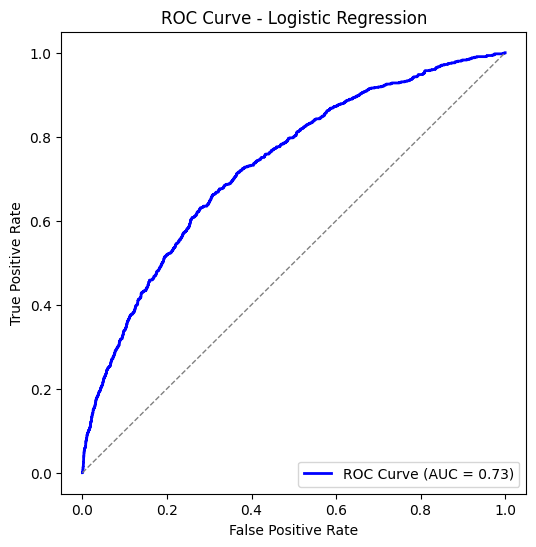

In [30]:

# 🔟 Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [33]:
# 11️⃣ Prediksi untuk data test (tanpa TARGET)
X_test = df_app_test.copy()

# Add the missing 'LOG_AMT_INCOME_TOTAL' column to X_test
X_test['LOG_AMT_INCOME_TOTAL'] = np.log1p(X_test['AMT_INCOME_TOTAL'])

# Ensure the columns in X_test are in the same order as X_train
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Or a suitable default value, 0 is used here to match the previous cell

X_test = X_test[X_train.columns]


y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:,1]

In [34]:

# 12️⃣ Simpan hasil prediksi test
df_app_test['PRED_CLASS'] = y_test_pred
df_app_test['PRED_PROB'] = y_test_pred_proba

print("\n✅ Prediksi data test berhasil! 5 baris pertama:")
print(df_app_test[['PRED_CLASS', 'PRED_PROB']].head())



✅ Prediksi data test berhasil! 5 baris pertama:
   PRED_CLASS  PRED_PROB
0           0   0.052170
1           0   0.242893
2           0   0.033076
3           0   0.029609
4           0   0.133958


#**RANDOM FOREST CLASSIFIER**

In [35]:
# 1️⃣ Import library tambahan
from sklearn.ensemble import RandomForestClassifier

In [36]:
# 2️⃣ Gunakan pipeline preprocessing yang sama seperti sebelumnya
# (jadi tidak perlu ulang OneHotEncoder/StandardScaler manual)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,      # jumlah pohon (bisa 100-500)
        max_depth=10,          # batasi kedalaman pohon untuk efisiensi
        random_state=42,
        n_jobs=-1              # gunakan semua core CPU
    ))
])

In [37]:
# 3️⃣ Latih model di data training
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_STA...
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [38]:
# 4️⃣ Prediksi di data validasi
y_pred_rf = rf_model.predict(X_val)
y_pred_rf_proba = rf_model.predict_proba(X_val)[:,1]

In [39]:
# 5️⃣ Evaluasi performa
print("✅ Accuracy (Random Forest):", accuracy_score(y_val, y_pred_rf))
print("\n✅ Classification Report (Random Forest):\n", classification_report(y_val, y_pred_rf))
print("\n✅ ROC AUC Score (Random Forest):", roc_auc_score(y_val, y_pred_rf_proba))

✅ Accuracy (Random Forest): 0.9195192617233608

✅ Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8569
           1       0.00      0.00      0.00       750

    accuracy                           0.92      9319
   macro avg       0.46      0.50      0.48      9319
weighted avg       0.85      0.92      0.88      9319


✅ ROC AUC Score (Random Forest): 0.7244062706655774


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


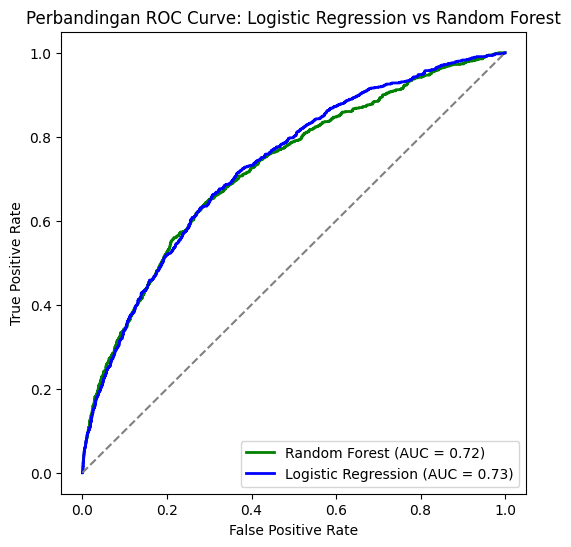

In [40]:
# 6️⃣ Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_score(y_val, y_pred_rf_proba):.2f})')

# Tambahkan ROC Logistic Regression untuk perbandingan
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_pred_proba)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perbandingan ROC Curve: Logistic Regression vs Random Forest')
plt.legend(loc="lower right")
plt.show()


#**EDA**

## **INSIGHT 1**

In [53]:
df_app_train['NAME_INCOME_TYPE'].value_counts()


,count
NAME_INCOME_TYPE,
Working,158774
Commercial associate,71617
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


In [54]:
income_default = df_app_train.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)
print(income_default)

NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095885
Commercial associate    0.074843
State servant           0.057550
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64


/tmp/ipython-input-3120986677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_default.index, y=income_default.values, palette="coolwarm")


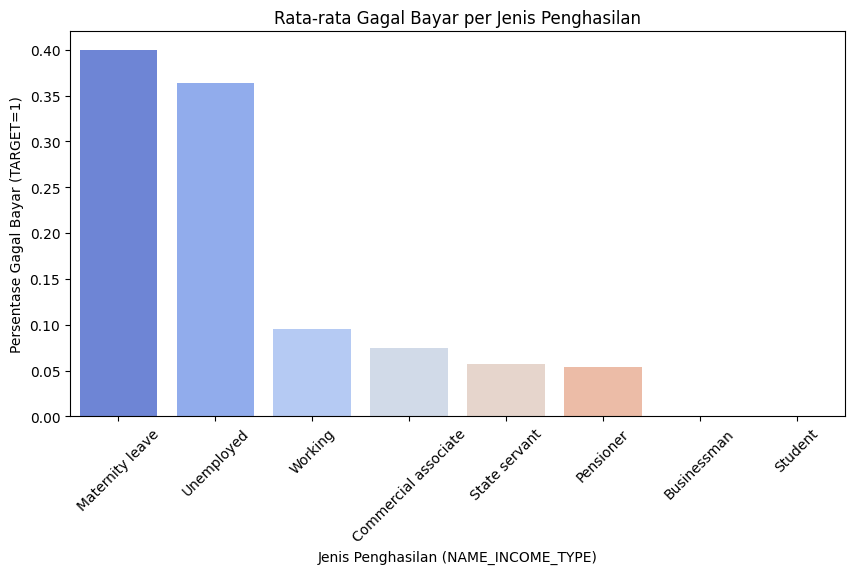

In [55]:
plt.figure(figsize=(10,5))
sns.piechart(x=income_default.index, y=income_default.values, palette="coolwarm")
plt.title("Rata-rata Gagal Bayar per Jenis Penghasilan")
plt.ylabel("Persentase Gagal Bayar (TARGET=1)")
plt.xlabel("Jenis Penghasilan (NAME_INCOME_TYPE)")
plt.xticks(rotation=45)
plt.show()

In [68]:
count_data = df_app_train['NAME_INCOME_TYPE'].value_counts()
rate_data = df_app_train.groupby('NAME_INCOME_TYPE')['TARGET'].mean()

insight_df = pd.DataFrame({'Jumlah_Nasabah': count_data, 'Default_Rate': rate_data})
print(insight_df)



                      Jumlah_Nasabah  Default_Rate
NAME_INCOME_TYPE                                  
Businessman                       10      0.000000
Commercial associate           71617      0.074843
Maternity leave                    5      0.400000
Pensioner                      55362      0.053864
State servant                  21703      0.057550
Student                           18      0.000000
Unemployed                        22      0.363636
Working                       158774      0.095885


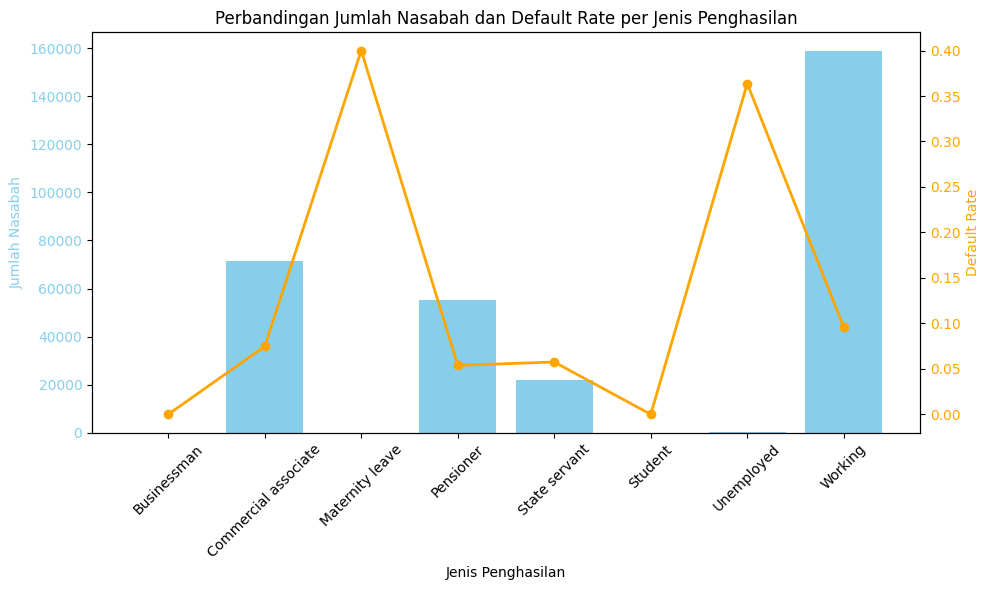

In [70]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart untuk jumlah nasabah
color = 'skyblue'
ax1.bar(insight_df.index, insight_df['Jumlah_Nasabah'], color=color)
ax1.set_xlabel('Jenis Penghasilan')
ax1.set_ylabel('Jumlah Nasabah', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

# Tambahkan axis kedua untuk Default Rate
ax2 = ax1.twinx()
color = 'orange'
ax2.plot(insight_df.index, insight_df['Default_Rate'], color=color, marker='o', linewidth=2)
ax2.set_ylabel('Default Rate', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Perbandingan Jumlah Nasabah dan Default Rate per Jenis Penghasilan')
plt.tight_layout()
plt.show()


##**INSIGHT 2**

In [73]:
# Kelompokkan berdasarkan jenis pekerjaan
income_credit_summary = (
    df_app_train.groupby('NAME_INCOME_TYPE')
    .agg({
        'AMT_INCOME_TOTAL': 'mean',
        'AMT_CREDIT': 'mean'
    })
    .reset_index()
)

# Tambahkan kolom rasio antara pinjaman dan pendapatan
income_credit_summary['Credit_to_Income_Ratio'] = (
    income_credit_summary['AMT_CREDIT'] / income_credit_summary['AMT_INCOME_TOTAL']
)

income_credit_summary.sort_values(by='Credit_to_Income_Ratio', ascending=False, inplace=True)
income_credit_summary


,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,Credit_to_Income_Ratio
6,Unemployed,110536.363636,7.643864e+05,6.915248
2,Maternity leave,140400.000000,7.497000e+05,5.339744
3,Pensioner,136401.292273,5.425461e+05,3.977573
4,State servant,179737.969506,6.698193e+05,3.726643
7,Working,163169.889223,5.770110e+05,3.536259
1,Commercial associate,202955.327289,6.699131e+05,3.300791
5,Student,170500.000000,5.107875e+05,2.995821
0,Businessman,652500.000000,1.228500e+06,1.882759


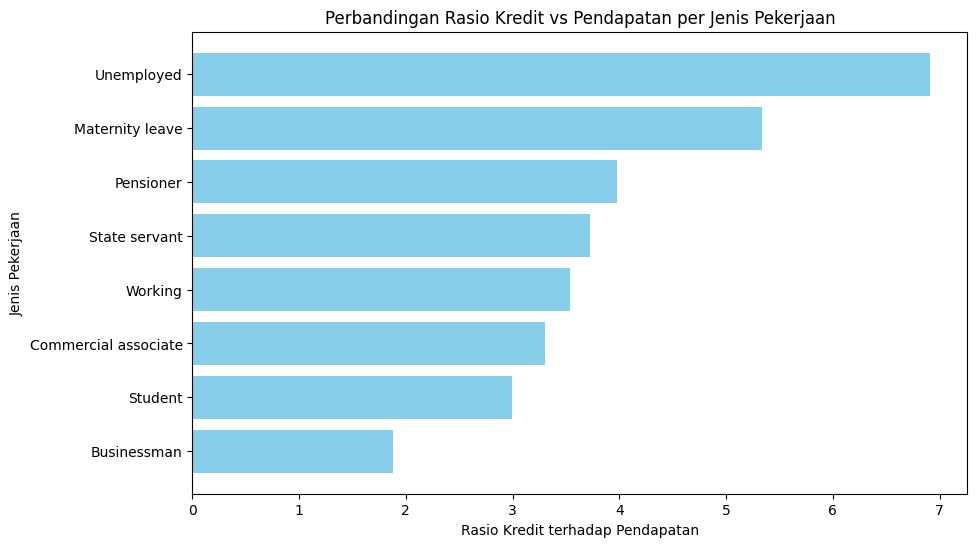

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(income_credit_summary['NAME_INCOME_TYPE'], income_credit_summary['Credit_to_Income_Ratio'], color='skyblue')
plt.xlabel('Rasio Kredit terhadap Pendapatan')
plt.ylabel('Jenis Pekerjaan')
plt.title('Perbandingan Rasio Kredit vs Pendapatan per Jenis Pekerjaan')
plt.gca().invert_yaxis()
plt.show()


/tmp/ipython-input-4090909425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_default.index, y=home_default.values, palette='coolwarm')


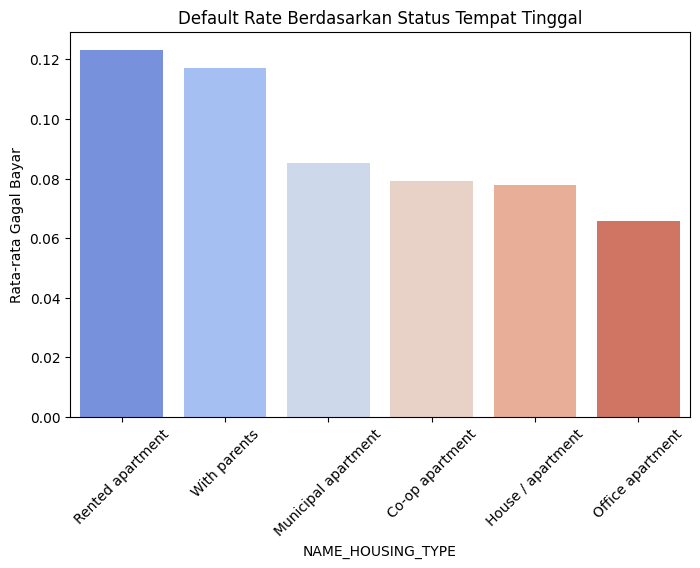

In [83]:
home_default = df_app_train.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=home_default.index, y=home_default.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Default Rate Berdasarkan Status Tempat Tinggal')
plt.ylabel('Rata-rata Gagal Bayar')
plt.show()


   TARGET  REFUSED_RATIO
0       0       0.121069
1       1       0.183312


/tmp/ipython-input-3121055671.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x='TARGET', y='REFUSED_RATIO', palette=['#4CAF50', '#E74C3C'])


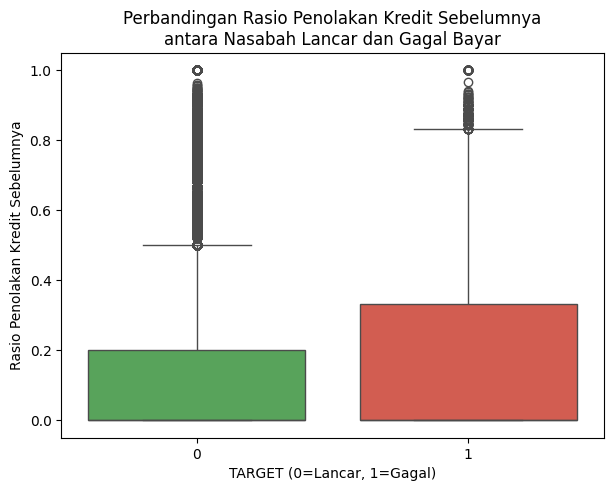

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Baca data
app = pd.read_csv("application_train.csv")
prev = pd.read_csv("previous_application.csv")

# 2️⃣ Hitung jumlah pengajuan sebelumnya yang disetujui & ditolak per nasabah
prev_status = prev.groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0).reset_index()

# 3️⃣ Gabungkan ke data utama
merged = app.merge(prev_status, on='SK_ID_CURR', how='left')

# 4️⃣ Ganti NaN dengan 0 (untuk nasabah tanpa riwayat)
merged = merged.fillna(0)

# 5️⃣ Buat rasio pinjaman ditolak terhadap total pengajuan sebelumnya
merged['REFUSED_RATIO'] = merged['Refused'] / (merged['Refused'] + merged['Approved'] + 1e-5)

# 6️⃣ Kelompokkan berdasarkan TARGET
insight_df = merged.groupby('TARGET')['REFUSED_RATIO'].mean().reset_index()
print(insight_df)

# 7️⃣ Visualisasi
plt.figure(figsize=(7,5))
sns.boxplot(data=merged, x='TARGET', y='REFUSED_RATIO', palette=['#4CAF50', '#E74C3C'])
plt.title('Perbandingan Rasio Penolakan Kredit Sebelumnya\nantara Nasabah Lancar dan Gagal Bayar')
plt.xlabel('TARGET (0=Lancar, 1=Gagal)')
plt.ylabel('Rasio Penolakan Kredit Sebelumnya')
plt.show()


/tmp/ipython-input-1949392916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


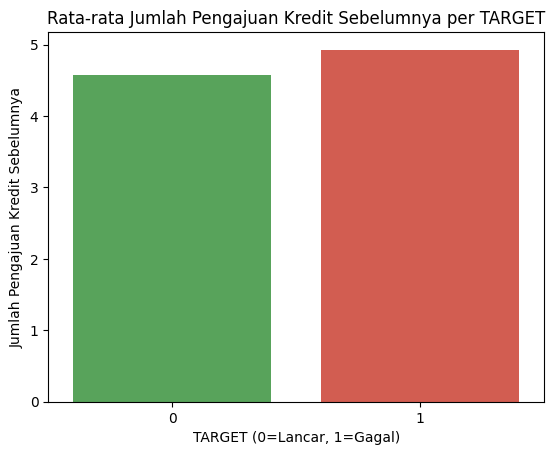

In [89]:
app_counts = prev.groupby('SK_ID_CURR').size().reset_index(name='TOTAL_APPLICATIONS')
merged = merged.merge(app_counts, on='SK_ID_CURR', how='left').fillna(0)

sns.barplot(
    data=merged.groupby('TARGET')['TOTAL_APPLICATIONS'].mean().reset_index(),
    x='TARGET', y='TOTAL_APPLICATIONS', palette=['#4CAF50', '#E74C3C']
)
plt.title('Rata-rata Jumlah Pengajuan Kredit Sebelumnya per TARGET')
plt.xlabel('TARGET (0=Lancar, 1=Gagal)')
plt.ylabel('Jumlah Pengajuan Kredit Sebelumnya')
plt.show()
